In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [2]:
from config import FLU_PATH

path = FLU_PATH

flu = pd.read_csv(path)

with open('week_dict.json', 'r') as f:
    week_dict = json.load(f)

In [3]:
# Create dataframe for country-level observations, no differentiation between sex or age
flu_CH = flu.query('georegion_type == "country" and agegroup == "all" and sex == "all"').copy()

# Create dataframe for regional observations, no differentiation between sex or age
flu_region = flu.query('georegion_type == "sentinella_region" and agegroup == "all" and sex == "all"').copy()

# Unknown georegion only contains NaN values
# CHECK: flu_region.query('georegion == "unknown"').popExtrapolation.unique()

# Drop unknown region entries from flu_region using mask
flu_region = flu_region[~(flu_region['georegion'] == 'unknown')]

In [4]:
flu_region = flu_region[~(flu_region['temporal'].isin(['2015-W53', '2020-W53']))]
flu_region['temporal'] = flu_region['temporal'].apply(lambda x: week_dict[x])

/var/folders/kj/mq0jlk2574705gvzk6d37lkh0000gn/T/ipykernel_6351/3323977110.py:12: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, (row_i, row_data) in enumerate(df_pivoted.iteritems()):
/var/folders/kj/mq0jlk2574705gvzk6d37lkh0000gn/T/ipykernel_6351/3323977110.py:13: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for j, (col_j, col_data) in enumerate(df_pivoted.iteritems()):


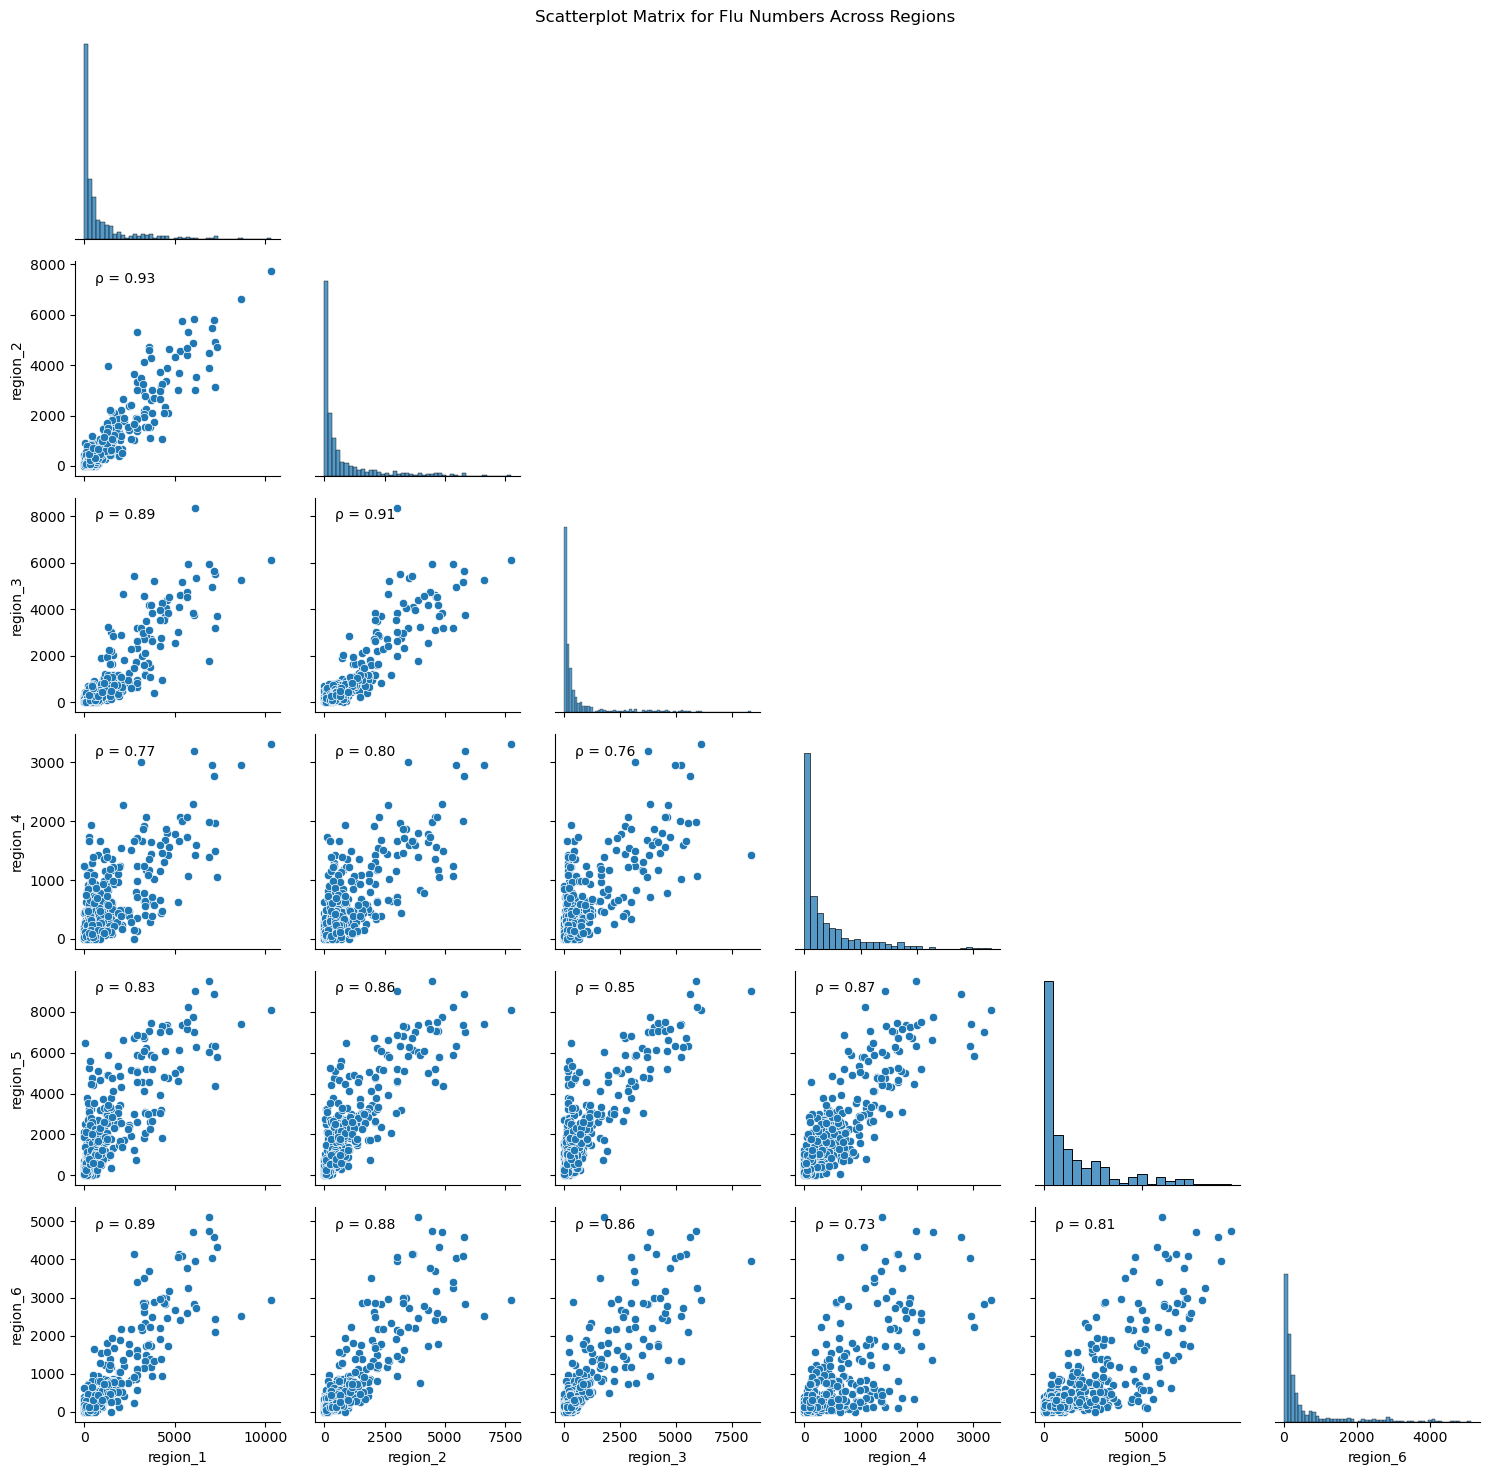

In [5]:
# Convert the 'temporal' column to datetime, ensuring it's a string first
flu_region['temporal'] = flu_region['temporal'].astype(str)
flu_region['temporal'] = pd.to_datetime(flu_region['temporal'])

# Pivot the DataFrame to get regions as columns and temporal as rows
df_pivoted = flu_region.pivot(index='temporal', columns='georegion', values='value')

# Plotting the scatterplot matrix
g = sns.pairplot(df_pivoted, kind='scatter', corner=True)

# Calculate and annotate correlation coefficients
for i, (row_i, row_data) in enumerate(df_pivoted.iteritems()):
    for j, (col_j, col_data) in enumerate(df_pivoted.iteritems()):
        if i > j:
            ax = g.axes[i, j]
            corr = col_data.corr(row_data)
            ax.text(0.1, 0.9, f"ρ = {corr:.2f}", transform=ax.transAxes)

plt.suptitle('Scatterplot Matrix for Flu Numbers Across Regions')

# Show the plot
plt.tight_layout()
plt.show()

In [6]:
df_pivoted

georegion,region_1,region_2,region_3,region_4,region_5,region_6
temporal,,,,,,
2013-01-06,918.5,734.4,1913.7,744.4,1208.0,1542.4
2013-01-13,1980.4,1980.9,961.8,1236.4,3417.7,1887.1
2013-01-20,3194.0,3001.2,1978.2,1660.0,4540.5,2150.3
2013-01-27,5296.0,4570.3,4598.6,2078.5,5205.2,2402.0
2013-02-03,8654.2,6612.4,5254.1,2955.8,7383.0,2507.8
...,...,...,...,...,...,...
2023-10-15,1500.6,642.2,476.4,111.9,1769.4,270.0
2023-10-22,409.0,1169.0,702.5,77.7,1997.4,642.3
2023-10-29,985.3,985.3,429.7,138.8,1263.5,299.8
